# Flight price prediction

The data for this project is available [here](https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering/tree/main/Flight%20Prediction).

## Contents
1. [Importing required libraries](#Importing-required-libraries)
2. [Feature Engineering](#Feature-Engineering)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)  
    3.1. [Plotting the top 5 most frequent Airlines](#Plotting-the-top-5-most-frequent-Airlines)  
    3.2. [Plotting the five most frequent Source cities](#Plotting-the-five-most-frequent-Source-cities)  
    3.3. [Plotting the Frequency Chart for Destination Cities](#Plotting-the-Frequency-Chart-for-Destination-Cities)  
    3.4. [Plotting the Frequency Chart 10 most frequent Routes](#Plotting-the-Frequency-Chart-10-most-frequent-Routes)  
    3.5. [Plotting the frequency chart of each number of stops for the flights](#Plotting-the-frequency-chart-of-each-number-of-stops-for-the-flights)  
    3.6. [Plotting the frequency chart for each value of Additional_Info](#Plotting-the-frequency-chart-for-each-value-of-Additional_Info)  
    3.7. [Plotting the frequency chart for each day of departure](#Plotting-the-frequency-chart-for-each-day-of-departure)  
    3.8. [Plotting the frequency chart for Months of departure](#Plotting-the-frequency-chart-for-Months-of-departure)  
    3.9. [Plotting the frequency chart for Arrival Hours](#Plotting-the-frequency-chart-for-Arrival-Hours)  
    3.10. [Plotting the frequency chart for Arrival Minutes](#Plotting-the-frequency-chart-for-Arrival-Minutes)  
    3.11. [Plotting the frequency chart for Departure Hours](#Plotting-the-frequency-chart-for-Departure-Hours)  
    3.12. [Plotting the frequency chart for Departure Minutes](#Plotting-the-frequency-chart-for-Departure-Minutes)  
    3.13. [Flights with longest duration](#Flights-with-longest-duration)  
    3.14. [Flights with Shortest Duration](#Flights-with-Shortest-Duration)  
    3.15. [Cheapest flight](#Cheapest-flight)  
    3.16. [Costliest flight](#Costliest-flight)  
    3.17. [Top 10 expensive flights](#Top-10-expensive-flights)  
    3.18. [Top 10 cheapest flights](#Top-10-cheapest-flights)  
4. [Data Preprocessing](#Data-Preprocessing)  
    4.1. [Label encoding the categorical columns](#Label-encoding-the-categorical-columns)  
    4.2. [Saving the processed data into separate training and test dataset](#Saving-the-processed-data-into-separate-training-and-test-dataset)  
    4.3. [Scaling the features](#Scaling-the-features)  
5. [Splitting the data into training and validation dataset](#Splitting-the-data-into-training-and-validation-dataset)
6. [Training the model](#Training-the-model)  
    6.1. [Comparing the feature importance](#Comparing-the-feature-importance)  
    6.2. [Excluding the features with the least importance to see if that improves the accuracy score](#Excluding-the-features-with-the-least-importance-to-see-if-that-improves-the-accuracy-score)  
7. [References](#References)

### Importing required libraries

In [1]:
# imorting basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import joblib
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

Loading the data

In [2]:
train_df= pd.read_excel('Data_Train.xlsx')

In [3]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
test_df= pd.read_excel('Test_set.xlsx')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


Combining the train and test data into a single dataframe.

In [394]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [395]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


It can be seen that most of the features are in string data type.

### Feature Engineering

In [396]:
a=train_df['Date_of_Journey'].str

In [398]:
a= a.split('/')

In [399]:
a

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [400]:
type(a)

pandas.core.series.Series

In [401]:
a= a.str

In [402]:
type(a)

pandas.core.strings.accessor.StringMethods

In [404]:
a[1]

0        03
1        05
2        06
3        05
4        03
         ..
10678    04
10679    04
10680    04
10681    03
10682    05
Name: Date_of_Journey, Length: 10683, dtype: object

Splitting the **Date_of_Journey** column into **Day**, **Month**, **Year** separately. 

In [405]:
train_df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [5]:
# feature engineering
train_df['Date']= train_df['Date_of_Journey'].str.split('/').str[0]
train_df['Month']= train_df['Date_of_Journey'].str.split('/').str[1]
train_df['Year']= train_df['Date_of_Journey'].str.split('/').str[2]

In [6]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


Casting those features as int datatype.

In [408]:
train_df['Date']= train_df['Date'].astype(int)
train_df['Month']= train_df['Month'].astype(int)
train_df['Year']= train_df['Year'].astype(int)

In [409]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


Since the split columns provide the information required, the 'Date_of_Journey' columns becomes redundant. Hence, it is dropped from the dataframe. 

In [410]:
train_df.drop('Date_of_Journey', axis=1, inplace=True)

In [411]:
train_df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019


The Arrival_Time column also has value of the date of arrival which is not required, hence it is sliced from the time.

In [412]:
train_df['Arrival_Time']= train_df['Arrival_Time'].str.split(' ').str[0]
train_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


Arrival time can be split into arriaval hour and arrival minute. 

In [413]:
train_df['Arrival Hour']= train_df['Arrival_Time'].str.split(':').str[0]
train_df['Arrival Minute']= train_df['Arrival_Time'].str.split(':').str[1]

In [414]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


Arrival Hour and Arrival Minute are converted back to integer.

In [415]:
train_df['Arrival Hour']= train_df['Arrival Hour'].astype(int)
train_df['Arrival Minute']= train_df['Arrival Minute'].astype(int)

In [416]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Arrival Hour     10683 non-null  int32 
 14  Arrival Minute   10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


Since the column Arrival_Time has become redundant, it is dropped from the dataframe.

In [417]:
train_df.drop('Arrival_Time', axis=1, inplace=True)

In [418]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


The **Dep_Time** column is split into **Departure Hour** and **Departure Minute**.

In [419]:
train_df['Departure Hour']= train_df['Dep_Time'].str.split(':').str[0]
train_df['Departure Minute']= train_df['Dep_Time'].str.split(':').str[1]

In [420]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [421]:
train_df['Departure Hour']= train_df['Departure Hour'].astype(int)
train_df['Departure Minute']= train_df['Departure Minute'].astype(int)

In [422]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10683 non-null  object
 5   Duration          10683 non-null  object
 6   Total_Stops       10682 non-null  object
 7   Additional_Info   10683 non-null  object
 8   Price             10683 non-null  int64 
 9   Date              10683 non-null  int32 
 10  Month             10683 non-null  int32 
 11  Year              10683 non-null  int32 
 12  Arrival Hour      10683 non-null  int32 
 13  Arrival Minute    10683 non-null  int32 
 14  Departure Hour    10683 non-null  int32 
 15  Departure Minute  10683 non-null  int32 
dtypes: int32(7), int64(1), object(8)
memory usage: 1.0+ MB


In [423]:
train_df.drop('Dep_Time', axis=1, inplace=True)

In [424]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


Checking for missing values in the data.

In [425]:
train_df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Duration            0
Total_Stops         1
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival Hour        0
Arrival Minute      0
Departure Hour      0
Departure Minute    0
dtype: int64

In [426]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

**Encoding** the values with corresponding number of stops.

In [5]:
train_df['Total_Stops']= train_df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [6]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302


In [7]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Assuming that there will be two stops between Delhi and Cochin and filling it in the missing place.

In [8]:
train_df['Total_Stops'].fillna(2, axis=0, inplace=True)

In [9]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [10]:
train_df['Total_Stops'].isnull().sum()

0

In [433]:
(train_df['Duration'].str.split(' ').str[0].str[:-1].astype(int))*60 

0         120
1         420
2        1140
3         300
4         240
         ... 
10678     120
10679     120
10680     180
10681     120
10682     480
Name: Duration, Length: 10683, dtype: int32

In [434]:
train_df['Duration'].str.split(' ').str[1].str[:-1]

0         50
1         25
2        NaN
3         25
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     40
10682     20
Name: Duration, Length: 10683, dtype: object

It can be seen that there are null values in the minute column in the third row. It is checked below for other rows where it has occured.

In [435]:
train_df[train_df['Duration'].str.split(' ').str[1].str[:-1].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,23h,2.0,No info,13381,12,6,2019,19,15,20,15
33,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,22h,2.0,In-flight meal not included,10919,15,6,2019,12,35,14,35
44,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h,1.0,No info,13062,21,3,2019,21,0,9,0
53,IndiGo,Banglore,Delhi,BLR → DEL,3h,0.0,No info,3943,18,6,2019,0,15,21,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,Jet Airways,Delhi,Cochin,DEL → ATQ → BOM → COK,23h,2.0,No info,14300,12,6,2019,19,0,20,0
10638,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,14h,1.0,In-flight meal not included,7832,21,3,2019,11,25,21,25
10639,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,38h,3.0,No info,10493,3,6,2019,19,15,5,15
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h,2.0,No info,16704,27,5,2019,4,25,13,25


There is a value of 5 minutes for duration in a row.

These two rows are dropped as it is not possible for duration to be so small.

In [11]:
train_df[train_df['Duration']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2.0,No info,17327


In [12]:
train_df.drop(train_df[train_df['Duration']=='5m'].index, inplace=True)

In [13]:
train_df[train_df['Duration']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


**Duration** column is split into **Duration Hr** and **Duration Min** columns.

In [439]:
train_df['Duration Hr']=train_df['Duration'].str.split(' ').str[0].str[:-1].astype(int)

In [440]:
train_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0.0,No info,4107,9,4,2019,22,25,19,55,2
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,4145,27,4,2019,23,20,20,45,2
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0.0,No info,7229,27,4,2019,11,20,8,20,3
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0.0,No info,12648,1,3,2019,14,10,11,30,2


In [441]:
train_df['Duration Min']=train_df['Duration'].str.split(' ').str[1].str[:-1]

In [442]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50,4,45


Filling the missing value for Duration Minute with 0. 

In [14]:
train_df['Duration Min'].fillna(0, inplace=True)

KeyError: 'Duration Min'

In [444]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50,4,45


In [445]:
train_df['Duration Min'].isnull().sum()

0

Casting the Duration Minute column into int datatype.

In [446]:
train_df['Duration Min']=train_df['Duration Min'].astype(int)

In [447]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Source            10682 non-null  object 
 2   Destination       10682 non-null  object 
 3   Route             10681 non-null  object 
 4   Duration          10682 non-null  object 
 5   Total_Stops       10682 non-null  float64
 6   Additional_Info   10682 non-null  object 
 7   Price             10682 non-null  int64  
 8   Date              10682 non-null  int32  
 9   Month             10682 non-null  int32  
 10  Year              10682 non-null  int32  
 11  Arrival Hour      10682 non-null  int32  
 12  Arrival Minute    10682 non-null  int32  
 13  Departure Hour    10682 non-null  int32  
 14  Departure Minute  10682 non-null  int32  
 15  Duration Hr       10682 non-null  int32  
 16  Duration Min      10682 non-null  int32 

The complete duration of the flight will be expressed in minutes only.

In [448]:
train_df['Duration Min']= (train_df['Duration Hr']*60) +train_df['Duration Min']

In [449]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20,2,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50,7,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25,19,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50,4,285


In [450]:
train_df.drop(['Duration', 'Duration Hr'], axis=1, inplace=True)

In [451]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,2019,21,35,16,50,285


In [452]:
train_df.describe()

,Total_Stops,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9086.292735,13.509081,4.708762,2019.0,13.348530,24.687793,12.490358,24.408819,643.152968
std,0.675229,4610.885695,8.479363,1.164294,0.0,6.859398,16.504203,5.748819,18.767225,507.848241
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,75.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,170.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,520.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,930.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000


In [15]:
categorical_cols= train_df.select_dtypes(include=object).columns.tolist()

In [16]:
print(categorical_cols)

['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info']


Removing the Route column.

In [17]:
categorical_cols.remove('Route')

In [18]:
numerical_columns= train_df.select_dtypes(include=np.number).columns.tolist()

In [19]:
print(numerical_columns)

['Total_Stops', 'Price']


In [20]:
numerical_columns.remove('Price')

## Exploratory Data Analysis

Getting the names of the different Airline companies.

In [459]:
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [460]:
airline_names= train_df['Airline'].unique().tolist()
print(airline_names)

['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet']


The count of each Airline in the data.

In [461]:
train_df['Airline'].value_counts().values

array([3849, 2053, 1751, 1196,  818,  479,  319,  194,   13,    6,    3,
          1], dtype=int64)

In [462]:
airline_values= train_df['Airline'].value_counts().values
airline_values

array([3849, 2053, 1751, 1196,  818,  479,  319,  194,   13,    6,    3,
          1], dtype=int64)

### Plotting the top 5 most frequent Airlines

In [463]:
matplotlib.rcParams['figure.figsize']= (10, 10)

([<matplotlib.patches.Wedge at 0x14929318370>,
 [Text(0.34596471798457207, 1.044178343919206, 'IndiGo'),
  Text(-1.0995901660329228, -0.030024436109433394, 'Air India'),
  Text(-0.3327031036895893, -1.0484792057047745, 'Jet Airways'),
  Text(0.666098782329189, -0.8753927188294246, 'SpiceJet'),
  Text(1.0613609284476497, -0.28898612348128916, 'Multiple carriers')],
 [Text(0.18870802799158473, 0.5695518239559305, '39.82%'),
  Text(-0.599776454199776, -0.016376965150600033, '21.24%'),
  Text(-0.1814744201943214, -0.5718977485662405, '18.11%'),
  Text(0.36332660854319393, -0.47748693754332244, '12.37%'),
  Text(0.5789241427896271, -0.15762879462615773, '8.46%')])

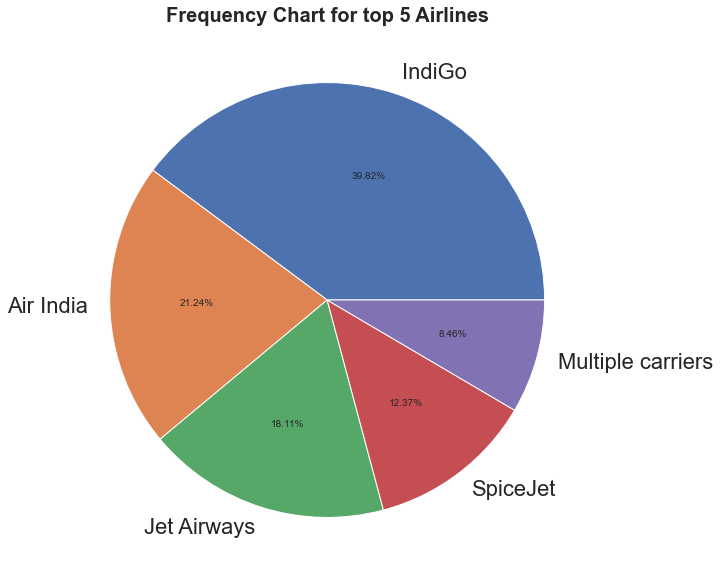

In [464]:
ply.title("Frequency Chart for top 5 Airlines", fontweight = 'bold', fontsize = '20')
ply.pie(x=airline_values[:5], labels=airline_names[:5], autopct='%.2f%%')

**Observation**<br>
The Airline appearing most of the times is IndiGo followed by Air India, Jet Airways, SpiceJet, Multiple carriers.

Getting the names of the different Source Cities.

In [465]:
train_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

### Plotting the five most frequent Source cities

[Text(0.5, 1.0, 'Frequency Chart for Source Cities'),
 Text(0.5, 0, 'Source Cities'),
 Text(0, 0.5, 'Count')]

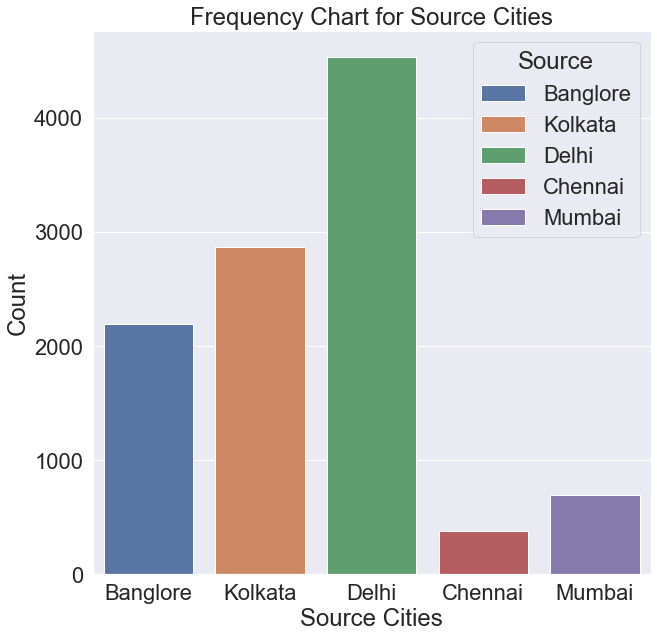

In [466]:
sns.set(font_scale=2)
sns.countplot(x='Source',hue='Source',data=train_df,dodge=False).set(title='Frequency Chart for Source Cities', xlabel='Source Cities', ylabel='Count')

It can be observed that the source for most of the flights is **Delhi**, followed by Kolkata, Bangalore, Mumbai and **Chennai**.

Getting the names of the different Destination cities.

In [467]:
train_df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

### Plotting the Frequency Chart for Destination Cities

[Text(0.5, 1.0, 'Frequency Chart for Destination Cities'),
 Text(0.5, 0, 'Destination Cities'),
 Text(0, 0.5, 'Count')]

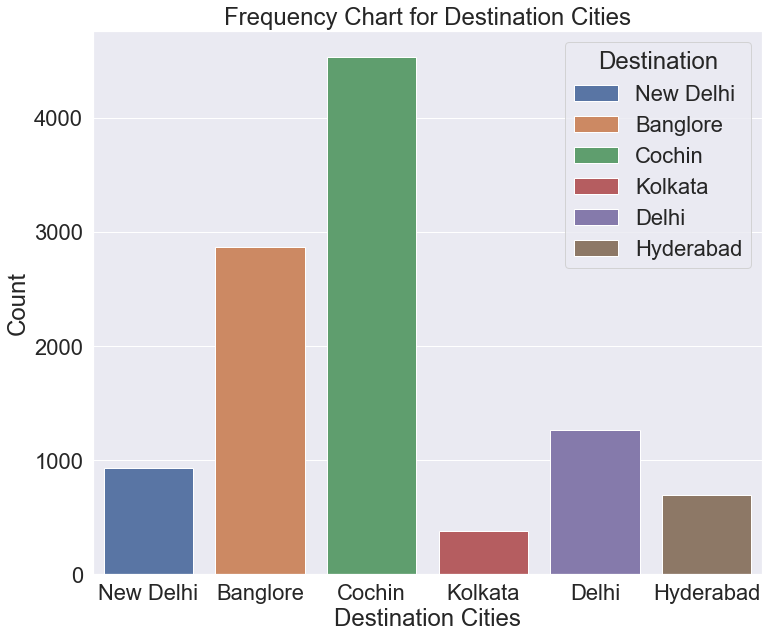

In [468]:
matplotlib.rcParams['figure.figsize']= (12, 10)
sns.countplot(x='Destination',hue='Destination',data=train_df,dodge=False).set(title='Frequency Chart for Destination Cities', xlabel='Destination Cities', ylabel='Count')

It can be observed that the destination for most of the flights is **Cochin**, followed by Bangalore, Delhi, New Delhi, Hyderabad and **Kolkata**.

Getting the different routes the flights travel through.

In [469]:
train_df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

### Plotting the Frequency Chart 10 most frequent Routes

[Text(0.5, 1.0, 'Frequency Chart for 10 most frequent Routes'),
 Text(0.5, 0, 'Routes'),
 Text(0, 0.5, 'Count')]

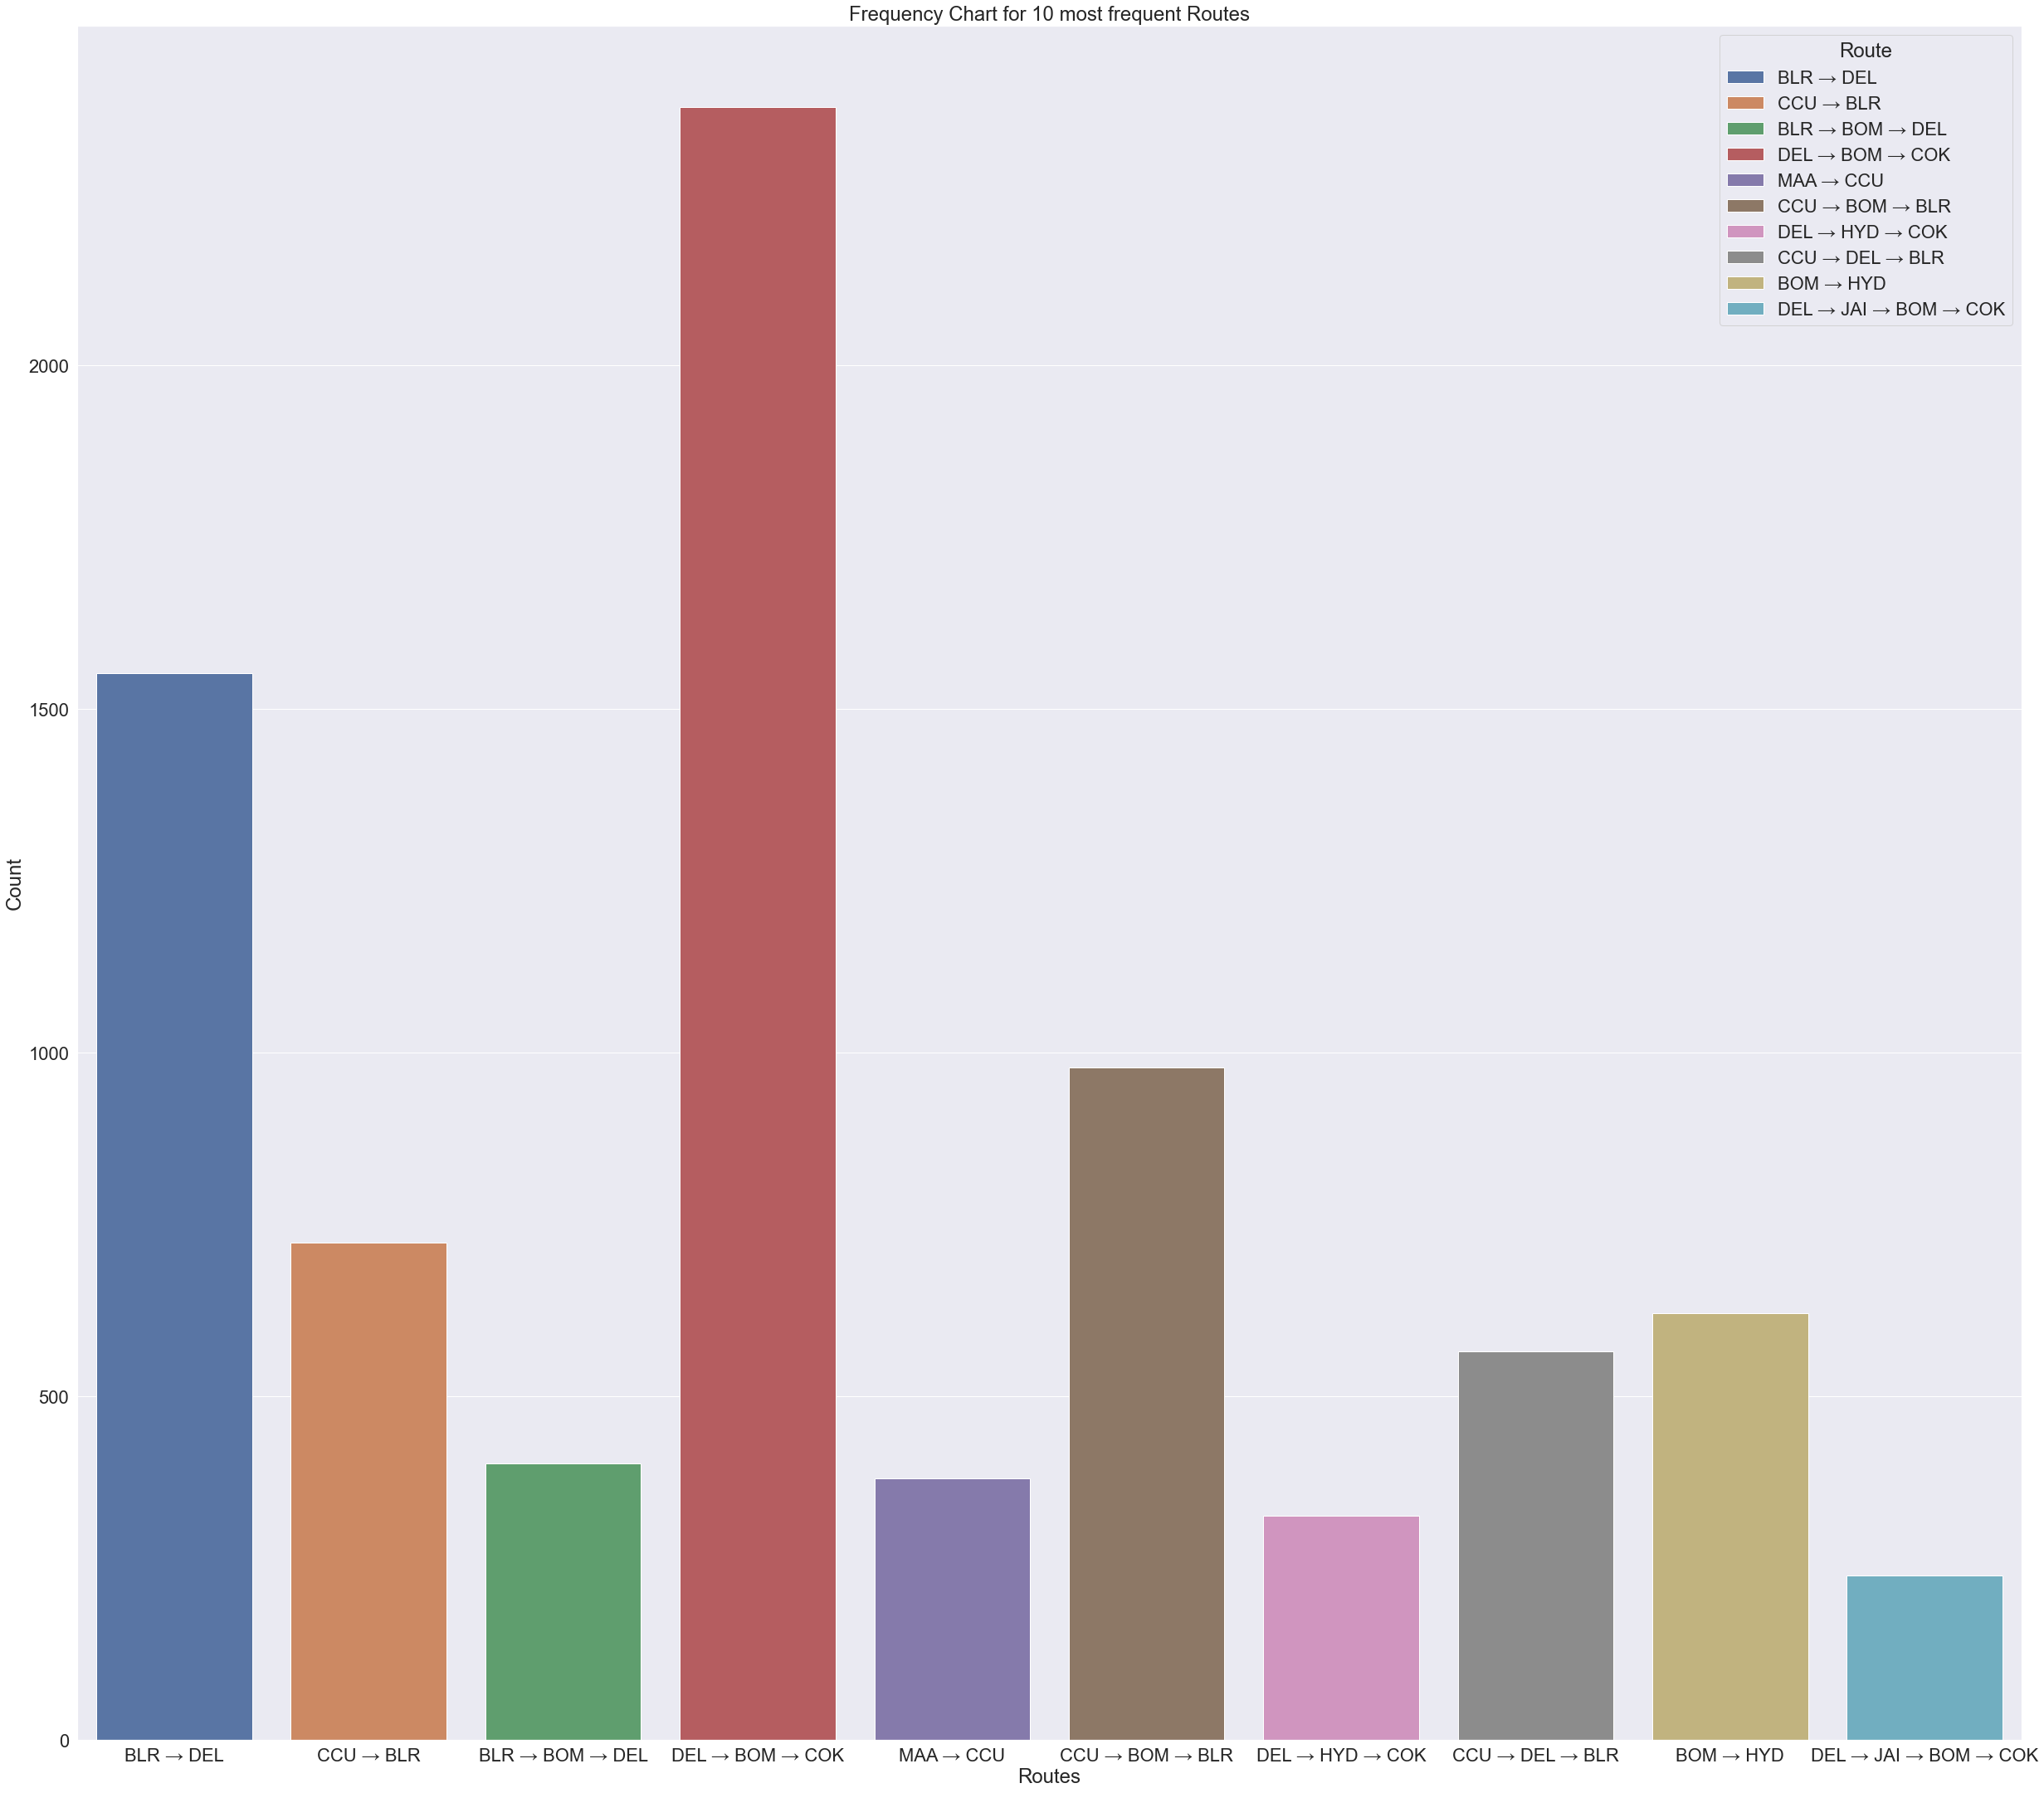

In [470]:
matplotlib.rcParams['figure.figsize']= (42, 38)
sns.countplot(x='Route',hue='Route',data=train_df[train_df['Route'].isin(train_df['Route'].value_counts().index[:10].tolist())],dodge=False).set(title='Frequency Chart for 10 most frequent Routes', xlabel='Routes', ylabel='Count')

Most travelled route is **DEL->BOM->COK** followed by BLR->DEL, CCU->BOM->BLR, CCU->BLR, BOM->HYD, CCU->DEL->BLR, BLR->BOM->DEL, MAA->CCU, DEL->HYD->COK, **DEL->JAI->BOM->COK**.

Getting the different number of stops for the flights.

In [471]:
train_df['Total_Stops'].unique()

array([0., 2., 1., 3., 4.])

### Plotting the frequency chart of each number of stops for the flights

[Text(0.5, 1.0, 'Frequency Chart for Number of Stops'),
 Text(0.5, 0, 'Number of Stops'),
 Text(0, 0.5, 'Count')]

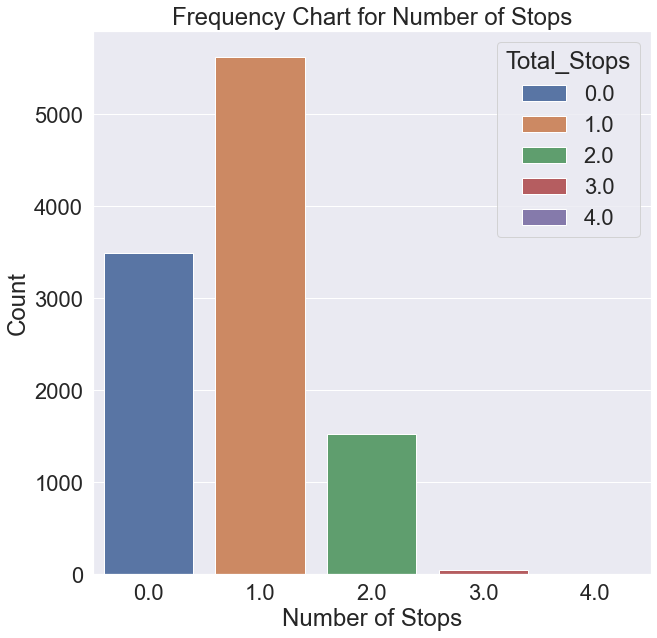

In [472]:
matplotlib.rcParams['figure.figsize']= (10, 10)
sns.countplot(x='Total_Stops',hue='Total_Stops',data=train_df,dodge=False).set(title='Frequency Chart for Number of Stops', xlabel='Number of Stops', ylabel='Count')

Most flights have **1** stop during the journey followed by 0, 2, 3, **4** stops.

Getting the unique values for Additional_Info.

In [473]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

There are two unique values for representing No information namely **'No info'** and **'No Info'**. Therefore every value of 'No info' is replaced with **'No Info'**.

In [474]:
train_df['Additional_Info'].replace(to_replace='No info', value='No Info', inplace=True)

In [475]:
train_df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

### Plotting the frequency chart for each value of Additional_Info

[Text(0.5, 1.0, 'Frequency Chart for Additional Information'),
 Text(0.5, 0, 'Additional Information'),
 Text(0, 0.5, 'Count')]

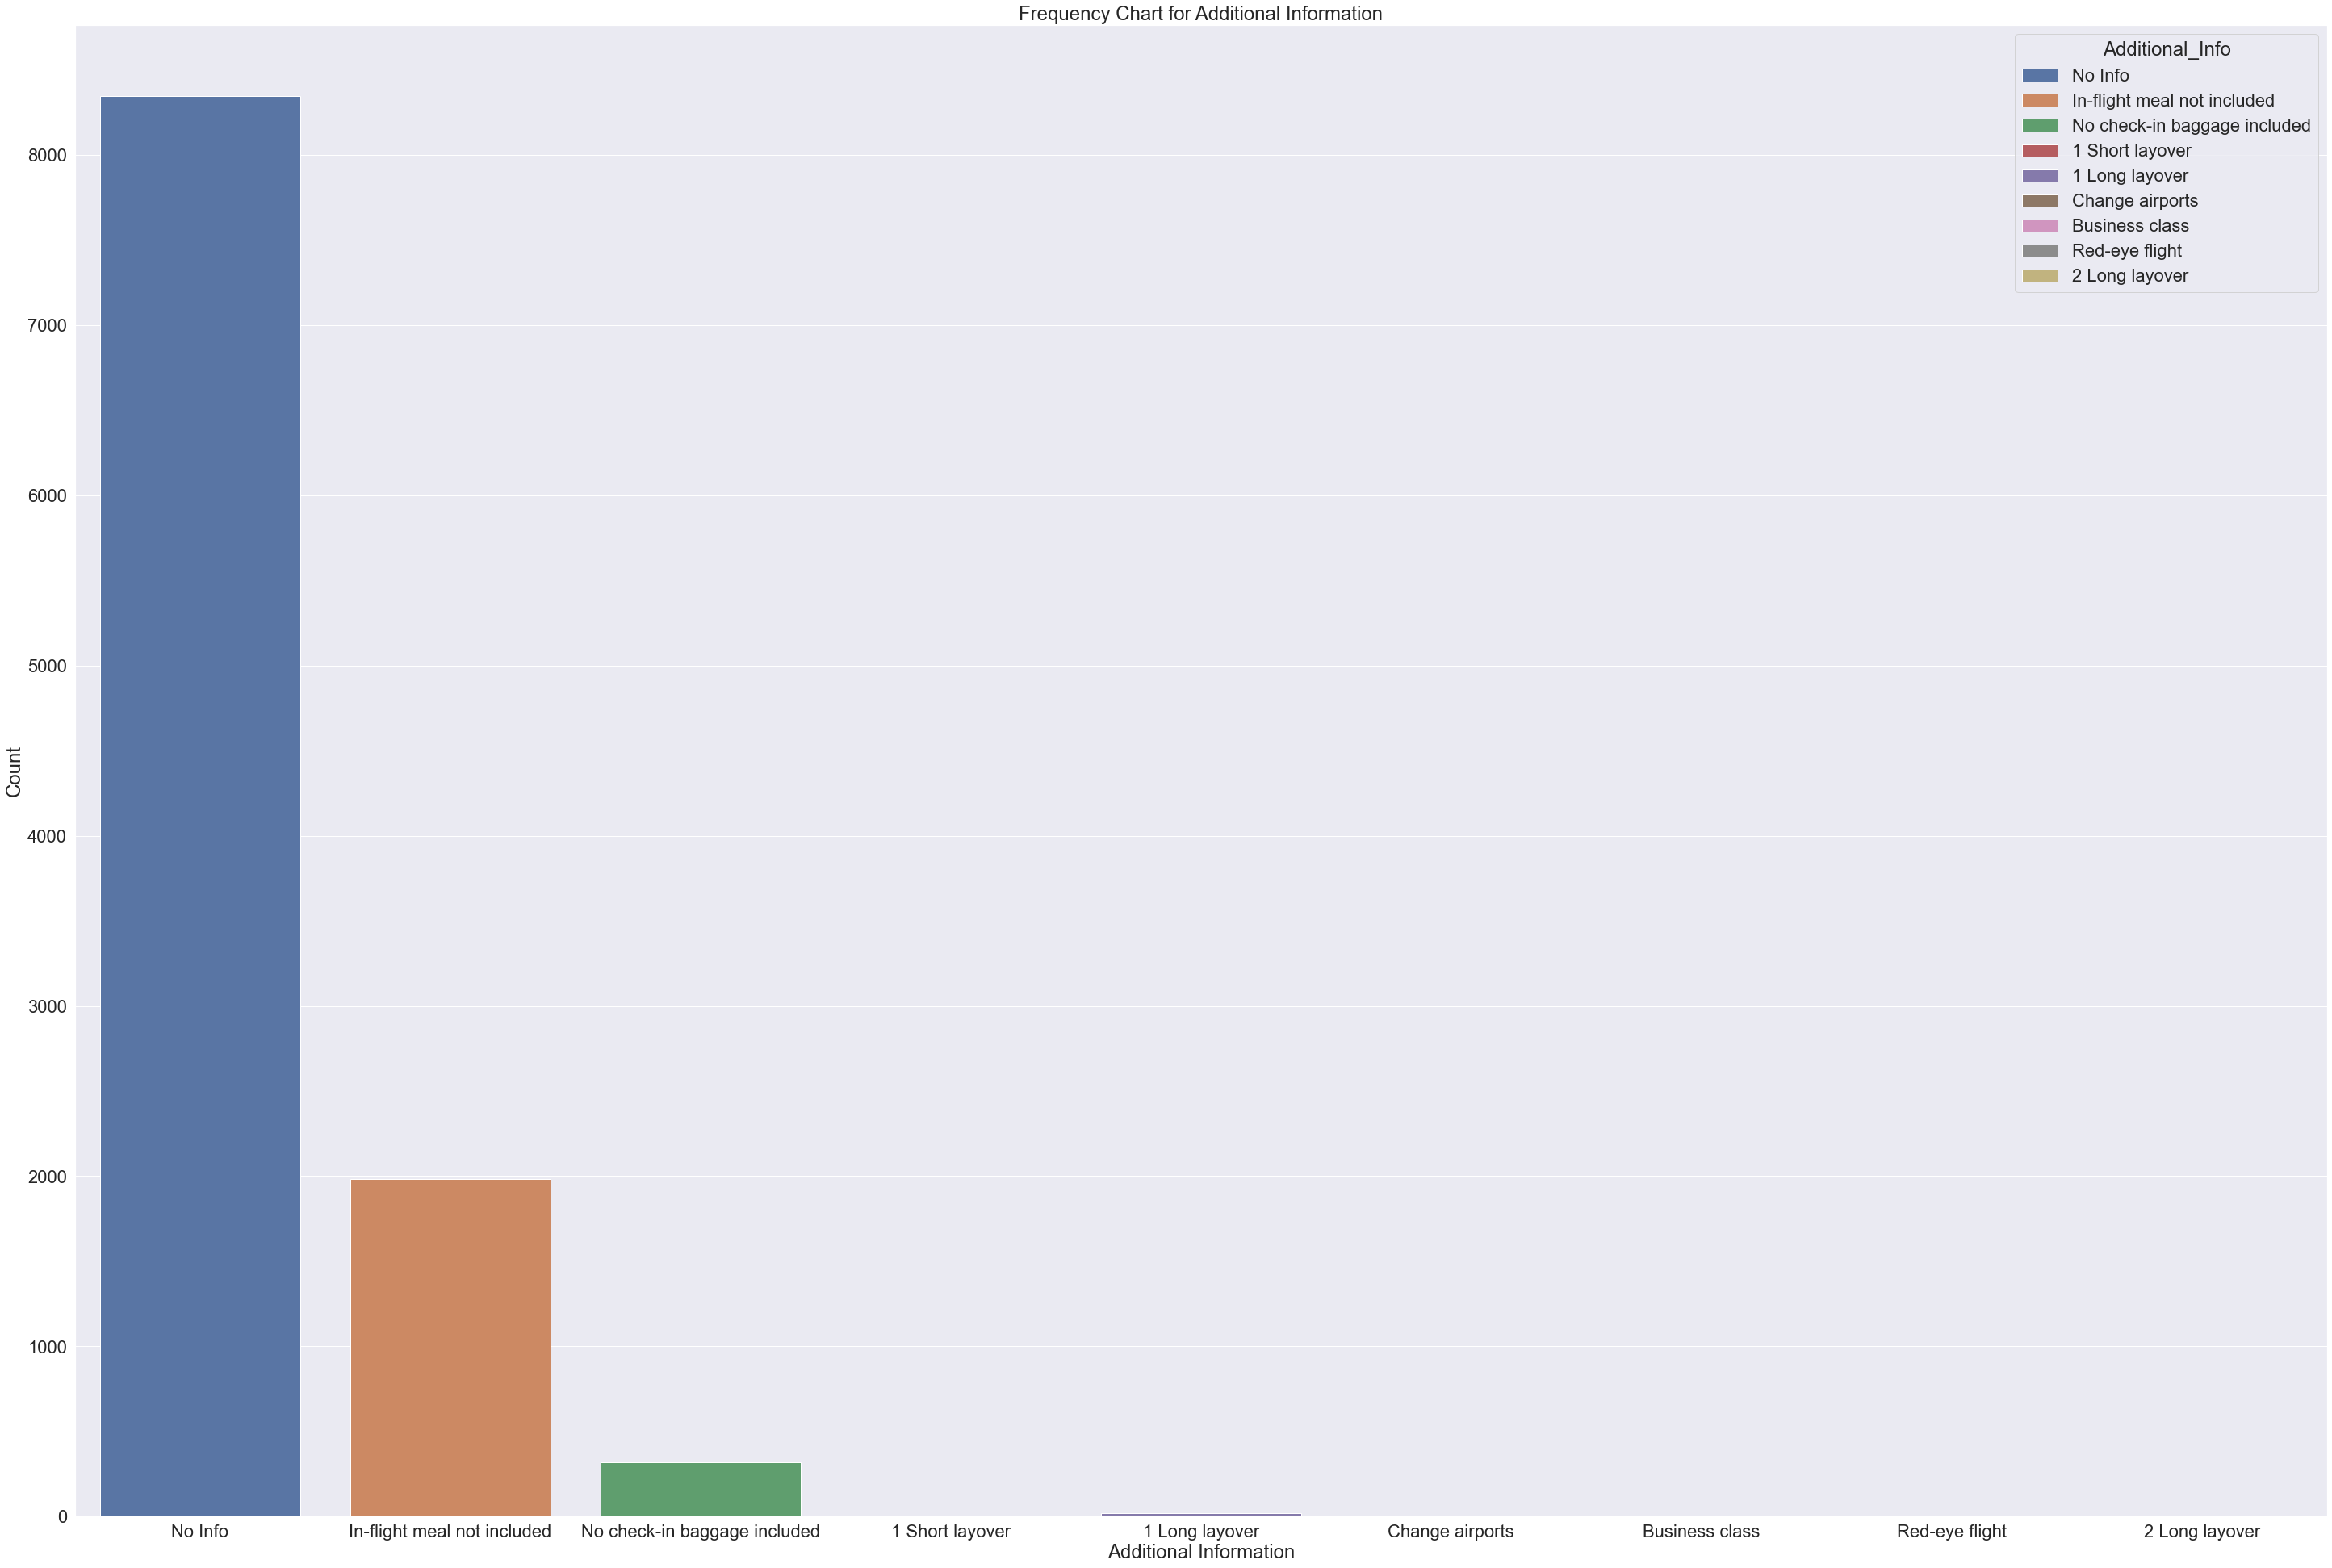

In [476]:
matplotlib.rcParams['figure.figsize']= (50, 34)
sns.countplot(x='Additional_Info',hue='Additional_Info',data=train_df,dodge=False).set(title='Frequency Chart for Additional Information', xlabel='Additional Information', ylabel='Count')

Most repeated value for Aditional Info is **'No Info'** follwed by 'In-flight meal not included', 'No check-in baggage included', '1 Long layover', 'Change airports', 'Buisness class', '1 Short layover', 'Red-eye flight' and **'2 Long layover'**.

Getting the days in which there is flight departure.

In [477]:
train_df['Date'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

### Plotting the frequency chart for each day of departure

[Text(0.5, 1.0, 'Frequency Chart for Days'),
 Text(0.5, 0, 'Days'),
 Text(0, 0.5, 'Count')]

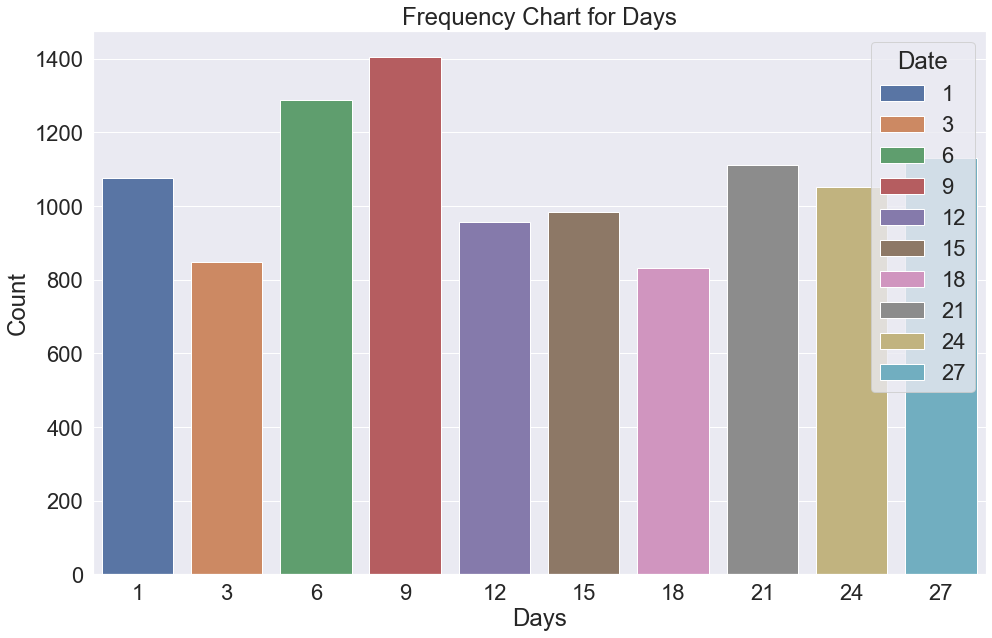

In [478]:
matplotlib.rcParams['figure.figsize']= (16, 10)
sns.countplot(x='Date',hue='Date',data=train_df,dodge=False).set(title='Frequency Chart for Days', xlabel='Days', ylabel='Count')

The **most frequent date** for the flights is **9th of every month**.<br>
The **least frequent date** for the flights is **18th of every month**. 

Getting the months for the departure of flights.

In [479]:
train_df['Month'].unique()

array([3, 5, 6, 4])

### Plotting the frequency chart for Months of departure

[Text(0.5, 1.0, 'Frequency Chart for Months'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Count')]

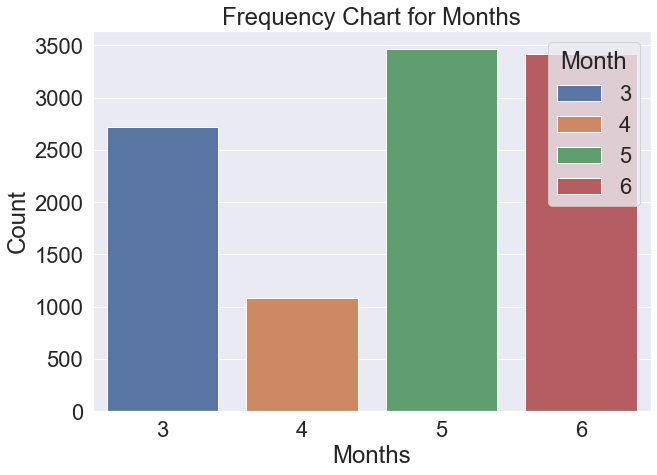

In [480]:
matplotlib.rcParams['figure.figsize']= (10, 7)
sns.countplot(x='Month',hue='Month',data=train_df,dodge=False).set(title='Frequency Chart for Months', xlabel='Months', ylabel='Count')

The **most frequent month** for the flights is **5 i.e. May** and the **least frequent month is 4 i.e. April**. 

In [481]:
train_df['Year'].unique()

array([2019])

The only year the data has is 2019. Since a constant feature would not have any effect on the target, it is removed from the numerical columns list.

In [482]:
numerical_columns.remove('Year')

In [483]:
train_df['Arrival Hour'].unique()

array([ 1, 13,  4, 23, 21, 11, 10,  5, 19, 22,  9, 12,  6,  8,  3, 20, 16,
       18, 15, 14,  0,  2,  7, 17])

### Plotting the frequency chart for Arrival Hours

[Text(0.5, 1.0, 'Frequency Chart for Arrival Hours'),
 Text(0.5, 0, 'Arrival Hours'),
 Text(0, 0.5, 'Count')]

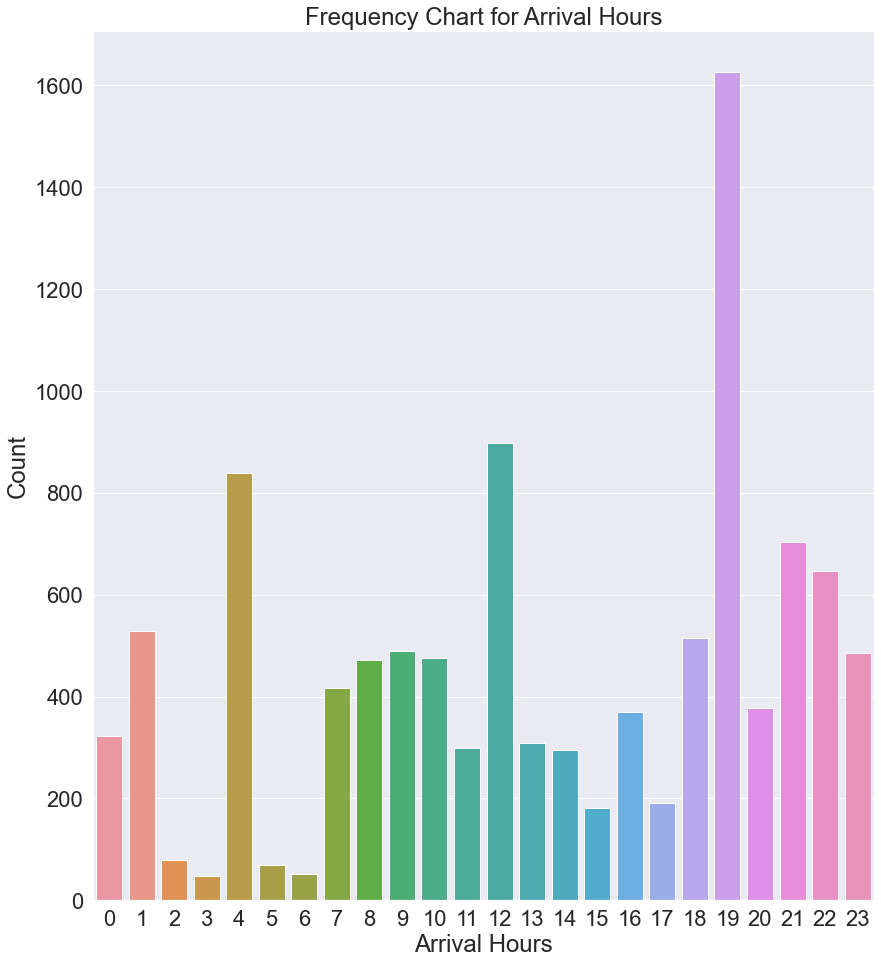

In [484]:
matplotlib.rcParams['figure.figsize']= (14, 16)
sns.countplot(x='Arrival Hour',data=train_df,dodge=False).set(title='Frequency Chart for Arrival Hours', xlabel='Arrival Hours', ylabel='Count')

**Observation**<br>
The **most frequent** arrival hour is **19 i.e. & 7PM**.
The **least frequent** arrival hour is **3AM**.

In [485]:
train_df['Arrival Minute'].unique()

array([10, 15, 25, 30, 35,  5,  0, 55, 20, 50, 45, 40])

### Plotting the frequency chart for Arrival Minutes

[Text(0.5, 1.0, 'Frequency Chart for Arrival Minute'),
 Text(0.5, 0, 'Arrival Minute'),
 Text(0, 0.5, 'Count')]

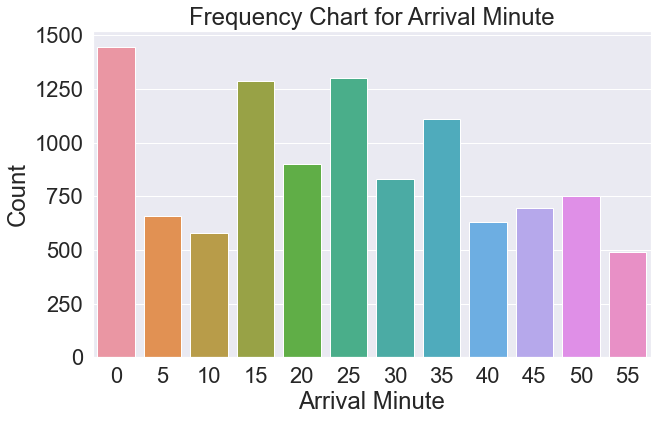

In [486]:
matplotlib.rcParams['figure.figsize']= (10, 6)
sns.countplot(x='Arrival Minute',data=train_df, dodge=False).set(title='Frequency Chart for Arrival Minute', xlabel='Arrival Minute', ylabel='Count')

**Observation**
<br>
The **most frequent** arrival minute is **0 i.e. the start of every hour**.
The **least frequent** arrival minute is the **55th minute of every hour**.

In [487]:
train_df['Departure Hour'].unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3])

### Plotting the frequency chart for Departure Hours

[Text(0.5, 1.0, 'Frequency Chart for Departure Hours'),
 Text(0.5, 0, 'Departure Hours'),
 Text(0, 0.5, 'Count')]

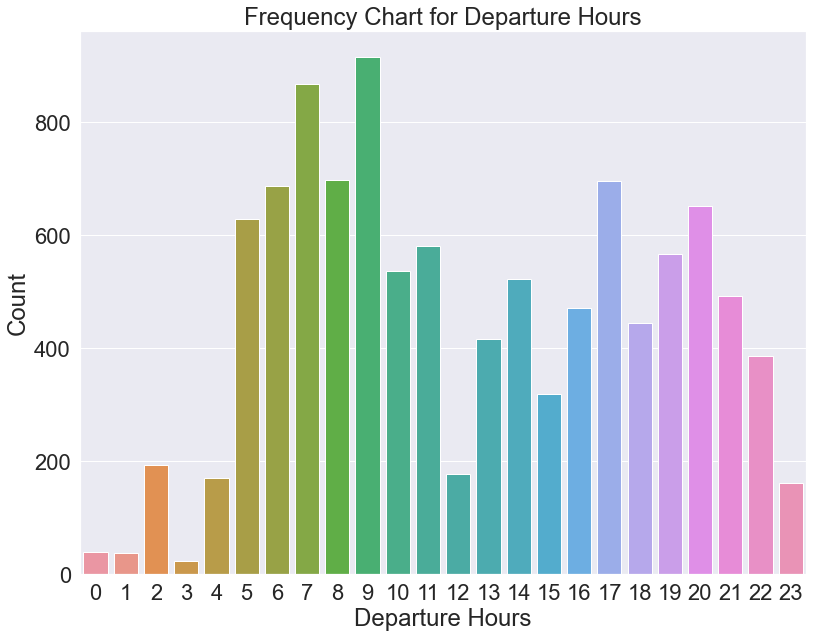

In [488]:
matplotlib.rcParams['figure.figsize']= (13, 10)
sns.countplot(x='Departure Hour',data=train_df, dodge=False).set(title='Frequency Chart for Departure Hours', xlabel='Departure Hours', ylabel='Count')

It can be seen that the **most frequent hour of departure is 9 and the least frequent hour is 3**.

### Plotting the frequency chart for Departure Minutes

[Text(0.5, 1.0, 'Frequency Chart for Departure Minutes'),
 Text(0.5, 0, 'Departure Minute'),
 Text(0, 0.5, 'Count')]

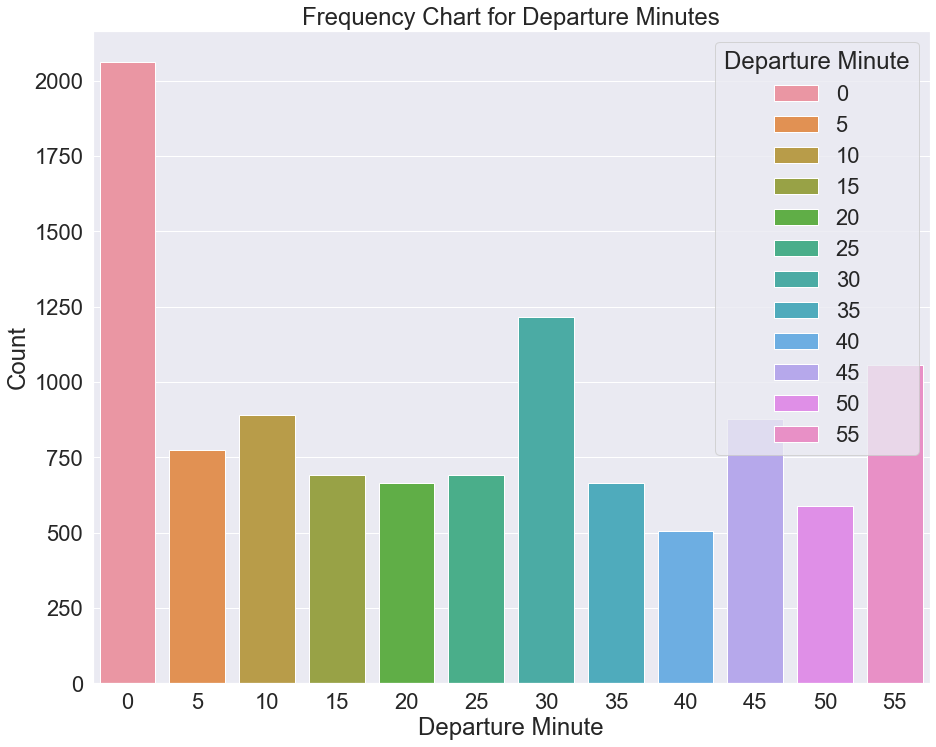

In [489]:
matplotlib.rcParams['figure.figsize']= (15, 12)
sns.countplot(x='Departure Minute',hue='Departure Minute',data=train_df,dodge=False).set(title='Frequency Chart for Departure Minutes', xlabel='Departure Minute', ylabel='Count')

The **most frequent departure minute is 0** and the **least frequent departure minute is 40**. 

### Flights with longest duration

In [490]:
train_df['Duration Min'].max()

2860

In [491]:
train_df[train_df['Duration Min']==train_df['Duration Min'].max()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
10456,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2.0,No Info,20694,6,3,2019,18,50,19,10,2860


The maximum duration for a flight is **2860 minutes i.e. 1 day 23hours 40 minutes** which was owned by **Jet Airways** going from **Delhi to Cochin**, departed Delhi on **6th March 2019 at 19:10** and arrived Cochin on **8th March 2019 at 18:50** with **2 stops**, the price of which was **Rs.20694**.  

### Flights with Shortest Duration

In [492]:
train_df['Duration Min'].min()

75

In [493]:
train_df[train_df['Duration Min']==train_df['Duration Min'].min()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
844,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3625,24,5,2019,20,45,19,30,75
1301,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100,9,5,2019,20,45,19,30,75
1322,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,5462,6,3,2019,20,45,19,30,75
1416,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,2050,18,3,2019,20,45,19,30,75
2083,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,2575,27,3,2019,20,45,19,30,75
2813,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100,21,5,2019,20,45,19,30,75
3708,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100,1,5,2019,20,45,19,30,75
3986,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100,15,5,2019,20,45,19,30,75
4137,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100,1,6,2019,20,45,19,30,75
4806,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,2050,3,4,2019,20,45,19,30,75


In [494]:
train_df[train_df['Duration Min']==train_df['Duration Min'].min()]['Airline'].unique()

array(['Air India'], dtype=object)

In [495]:
train_df[train_df['Duration Min']==train_df['Duration Min'].min()]['Route'].unique()

array(['BOM → HYD'], dtype=object)

The shortest duration for a flight is **75 minutes i.e. 1 hour 15 minutes**, which was owned by **Air India**, going from **Mumbai to Hyderabad**.

In [496]:
train_df['Price'].describe()

count    10682.000000
mean      9086.292735
std       4610.885695
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

### Cheapest flight

In [497]:
train_df[train_df['Price']==train_df['Price'].min()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759,21,3,2019,0,10,22,45,85
4274,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759,27,3,2019,0,10,22,45,85
4839,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759,3,4,2019,0,15,22,45,90
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759,27,3,2019,7,5,5,45,80


The cheapest flight is owned by **SpiceJet**, which goes from **Mumbai to Hyderabad** with **no stops** in the middle priced at **Rs. 1759**. 

### Costliest flight

In [498]:
train_df[train_df['Price']==train_df['Price'].max()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,Business class,79512,1,3,2019,11,25,5,45,340


The costliest flight is a **Business class** owned by **Jet Airways Business**, which goes from **Bangalore to New Delhi** with **one stop**, departed Bangalore on **1st March 2019 at 5:45 AM** and arrived in New Delhi on same day at **11:25 AM**, which cost **Rs. 79512**.

The average cost for a flight is Rs. 9085.

### Top 10 expensive flights

In [499]:
train_df.sort_values(by='Price', ascending=False).head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,Business class,79512,1,3,2019,11,25,5,45,340
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,Business class,62427,1,3,2019,12,25,5,45,400
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1.0,Business class,57209,1,3,2019,14,25,9,45,280
5439,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,54826,1,3,2019,23,0,16,55,365
1478,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,54826,18,3,2019,0,45,18,40,365
2618,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,54826,18,3,2019,5,5,22,50,375
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2.0,No Info,52285,6,3,2019,4,25,20,5,500
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,52229,1,3,2019,10,45,5,45,300
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2.0,No Info,46490,3,3,2019,4,25,20,5,500
396,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1.0,No Info,36983,1,3,2019,19,15,12,50,385


### Top 10 cheapest flights

In [500]:
train_df.sort_values(by='Price', ascending=True).head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759,21,3,2019,0,10,22,45,85
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759,27,3,2019,7,5,5,45,80
4274,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759,27,3,2019,0,10,22,45,85
4839,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759,3,4,2019,0,15,22,45,90
1513,Jet Airways,Mumbai,Hyderabad,BOM → HYD,0.0,In-flight meal not included,1840,27,3,2019,4,25,2,55,90
5940,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965,6,6,2019,14,45,13,15,90
387,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965,18,6,2019,14,45,13,15,90
4595,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965,3,5,2019,7,15,5,45,90
2426,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965,18,3,2019,0,10,22,45,85
1718,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965,24,5,2019,7,15,5,45,90


## Data Preprocessing

### Label encoding the categorical columns

In [21]:
from sklearn.preprocessing import OneHotEncoder
# label_encoder= LabelEncoder()
encoder= OneHotEncoder(sparse=False, handle_unknown='ignore')

In [22]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0.0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,12648


In [23]:
# encoders = {}
# for col in categorical_cols:
#     le = LabelEncoder().fit(final_df[col])
#     final_df[col] = le.transform(final_df[col])
#     encoders[col] = le

encoder.fit(train_df[categorical_cols])
encoded_cols= encoder.get_feature_names().tolist()
print(encoded_cols)

['x0_Air Asia', 'x0_Air India', 'x0_GoAir', 'x0_IndiGo', 'x0_Jet Airways', 'x0_Jet Airways Business', 'x0_Multiple carriers', 'x0_Multiple carriers Premium economy', 'x0_SpiceJet', 'x0_Trujet', 'x0_Vistara', 'x0_Vistara Premium economy', 'x1_01/03/2019', 'x1_03/03/2019', 'x1_06/03/2019', 'x1_09/03/2019', 'x1_1/03/2019', 'x1_1/04/2019', 'x1_1/05/2019', 'x1_1/06/2019', 'x1_12/03/2019', 'x1_12/04/2019', 'x1_12/05/2019', 'x1_12/06/2019', 'x1_15/03/2019', 'x1_15/04/2019', 'x1_15/05/2019', 'x1_15/06/2019', 'x1_18/03/2019', 'x1_18/04/2019', 'x1_18/05/2019', 'x1_18/06/2019', 'x1_21/03/2019', 'x1_21/04/2019', 'x1_21/05/2019', 'x1_21/06/2019', 'x1_24/03/2019', 'x1_24/04/2019', 'x1_24/05/2019', 'x1_24/06/2019', 'x1_27/03/2019', 'x1_27/04/2019', 'x1_27/05/2019', 'x1_27/06/2019', 'x1_3/03/2019', 'x1_3/04/2019', 'x1_3/05/2019', 'x1_3/06/2019', 'x1_6/03/2019', 'x1_6/04/2019', 'x1_6/05/2019', 'x1_6/06/2019', 'x1_9/03/2019', 'x1_9/04/2019', 'x1_9/05/2019', 'x1_9/06/2019', 'x2_Banglore', 'x2_Chennai', '

In [504]:
encoder.categories_

[array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
        'Jet Airways Business', 'Multiple carriers',
        'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
        'Vistara', 'Vistara Premium economy'], dtype=object),
 array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object),
 array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
       dtype=object),
 array(['1 Long layover', '1 Short layover', '2 Long layover',
        'Business class', 'Change airports', 'In-flight meal not included',
        'No Info', 'No check-in baggage included', 'Red-eye flight'],
       dtype=object)]

In [505]:
len(encoded_cols)

32

In [506]:
train_df[encoded_cols]= encoder.transform(train_df[categorical_cols])

In [507]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,...,x2_New Delhi,x3_1 Long layover,x3_1 Short layover,x3_2 Long layover,x3_Business class,x3_Change airports,x3_In-flight meal not included,x3_No Info,x3_No check-in baggage included,x3_Red-eye flight
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No Info,3897,24,3,2019,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No Info,7662,1,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No Info,13882,9,6,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No Info,6218,12,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No Info,13302,1,3,2019,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Removing the Route column from the dataframe.

In [508]:
train_df.drop('Route', axis=1, inplace=True)

In [509]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,...,x2_New Delhi,x3_1 Long layover,x3_1 Short layover,x3_2 Long layover,x3_Business class,x3_Change airports,x3_In-flight meal not included,x3_No Info,x3_No check-in baggage included,x3_Red-eye flight
0,IndiGo,Banglore,New Delhi,0.0,No Info,3897,24,3,2019,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Air India,Kolkata,Banglore,2.0,No Info,7662,1,5,2019,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2.0,No Info,13882,9,6,2019,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1.0,No Info,6218,12,5,2019,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1.0,No Info,13302,1,3,2019,21,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Since the column Year only has a constant value of 2019, it would not have any effect on the price. Hence it is removed. 

In [510]:
train_df.drop('Year', axis=1, inplace=True)

In [511]:
train_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival Hour,Arrival Minute,...,x2_New Delhi,x3_1 Long layover,x3_1 Short layover,x3_2 Long layover,x3_Business class,x3_Change airports,x3_In-flight meal not included,x3_No Info,x3_No check-in baggage included,x3_Red-eye flight
0,IndiGo,Banglore,New Delhi,0.0,No Info,3897,24,3,1,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Air India,Kolkata,Banglore,2.0,No Info,7662,1,5,13,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2.0,No Info,13882,9,6,4,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1.0,No Info,6218,12,5,23,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1.0,No Info,13302,1,3,21,35,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,No Info,4107,9,4,22,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10679,Air India,Kolkata,Banglore,0.0,No Info,4145,27,4,23,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10680,Jet Airways,Banglore,Delhi,0.0,No Info,7229,27,4,11,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10681,Vistara,Banglore,New Delhi,0.0,No Info,12648,1,3,14,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Saving the processed data into separate training and test dataset

In [512]:
test_df= final_df[final_df['Price'].isnull()]

In [513]:
test_df

Removing the Price column from the dataframe, because that is what will be predicted using the available data.

In [514]:
test_df.drop('Price', axis=1, inplace=True)

In [515]:
test_df

In [516]:
train_df= final_df[final_df['Price'].notna()]

In [517]:
train_df

In [518]:
train_target= train_df['Price']
train_target

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [519]:
train_df.drop('Price', axis=1, inplace=True)

In [520]:
train_df

In [521]:
input_df= train_df[numerical_columns+encoded_cols]
input_df

,Total_Stops,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min,x0_Air Asia,x0_Air India,...,x2_New Delhi,x3_1 Long layover,x3_1 Short layover,x3_2 Long layover,x3_Business class,x3_Change airports,x3_In-flight meal not included,x3_No Info,x3_No check-in baggage included,x3_Red-eye flight
0,0.0,24,3,1,10,22,20,170,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1,5,13,15,5,50,445,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,9,6,4,25,9,25,1140,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,12,5,23,30,18,5,325,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1,3,21,35,16,50,285,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,9,4,22,25,19,55,150,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10679,0.0,27,4,23,20,20,45,155,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10680,0.0,27,4,11,20,8,20,180,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10681,0.0,1,3,14,10,11,30,160,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Scaling the features

In [522]:
scaler= MinMaxScaler()
input_df=scaler.fit_transform(train_input)

In [523]:
input_df

The training set is converted to an array and it needs to be converted back into a dataframe.

In [524]:
input_df= pd.DataFrame(input_df)
input_df.columns= numerical_columns+encoded_cols
input_df

Labeling the columns.

In [525]:
print(test_df.columns.tolist())

In [526]:
train_df.columns=test_df.columns.tolist()

In [527]:
train_df

## Splitting the data into training and validation dataset

In [528]:
train_input, val_input, train_target, val_target= train_test_split(input_df, train_target, test_size=0.20, random_state=42)

In [529]:
train_input

,Total_Stops,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min,x0_Air Asia,x0_Air India,...,x2_New Delhi,x3_1 Long layover,x3_1 Short layover,x3_2 Long layover,x3_Business class,x3_Change airports,x3_In-flight meal not included,x3_No Info,x3_No check-in baggage included,x3_Red-eye flight
10005,1.0,27,5,19,15,8,30,645,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3684,1.0,9,5,12,35,11,30,1505,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1034,1.0,24,4,22,5,15,45,380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3909,1.0,21,3,1,35,12,50,765,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3088,2.0,24,6,19,15,17,15,1560,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.0,27,3,4,25,9,0,1165,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5191,1.0,9,5,20,45,14,5,400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5390,1.0,15,5,1,30,12,50,760,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,0.0,3,3,3,25,0,40,165,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [530]:
train_target

10005     9149
3684     12373
1034      5583
3909      7695
3088     11972
         ...  
5734     12242
5191     10844
5390      7670
860       6144
7271      5678
Name: Price, Length: 8545, dtype: int64

In [531]:
val_input

,Total_Stops,Date,Month,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min,x0_Air Asia,x0_Air India,...,x2_New Delhi,x3_1 Long layover,x3_1 Short layover,x3_2 Long layover,x3_Business class,x3_Change airports,x3_In-flight meal not included,x3_No Info,x3_No check-in baggage included,x3_Red-eye flight
6075,2.0,21,5,1,30,15,5,625,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3544,1.0,3,6,19,35,10,35,540,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9291,1.0,9,5,9,5,20,20,765,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5032,0.0,24,5,17,5,14,45,140,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2483,1.0,21,5,4,25,22,50,335,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,1.0,27,6,21,0,8,0,780,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9871,0.0,6,3,19,45,17,15,150,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10063,1.0,21,4,22,25,7,55,870,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8803,1.0,9,3,7,45,2,0,345,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [532]:
val_target

6075     16655
3544      4959
9291      9187
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8803      7060
8618     13731
Name: Price, Length: 2137, dtype: int64

In [ ]:
train_input.to_parquet('train_inputs.parquet')
pd.DataFrame(train_target).to_parquet('train_target.parquet')
val_input.to_parquet('val_input.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')

In [ ]:
train_input=pd.read_parquet('train_inputs.parquet')
train_target= pd.read_parquet('train_target.parquet')
val_input= pd.read_parquet('val_input.parquet')
val_target= pd.read_parquet('val_target.parquet')

## Training the model

XGBoost model is chosen due to its reliability.

In [533]:
model =XGBRegressor()

In [534]:
model.fit(train_input, train_target)

[16:46:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [535]:
model.score(train_input, train_target)

0.8241396259681436

In [536]:
model.score(val_input, val_target)

0.8431189216455379

In [ ]:
# model.predict(test_df[numerical_columns+encoded_cols])
model.predict(test_df)

### Comparing the feature importance

In [ ]:
model.feature_importances_

In [ ]:
matplotlib.rcParams['figure.figsize']= (15, 10)
sns.barplot(x=model.feature_importances_, y=train_df.columns.to_list(), orient='h').set(title='Feature Importance Chart', xlabel='Feature Importance', ylabel='Features')

It can seen from the above graph that the **most important feature** in predicting the price of the flight ticket is **Duration Minutes** and **Arrival Minute is the least important**.

In [ ]:
model_dict={
        'model':model,
        'scaler':scaler,
        'numerical columns':numerical_columns,
        'categorical columns':categorical_cols,
        'encoders':encoders
      }

joblib.dump(model_dict, 'flight price prediction model.joblib')

In [ ]:
print(model_dict)

In [ ]:
complete_model= joblib.load('flight price prediction model.joblib')
model=complete_model['model']
scaler=complete_model['scaler']
numerical_columns=complete_model['numerical columns']
categorical_columns=complete_model['categorical columns']

In [ ]:
pred= model.predict(train_input)
print(pred)

Finding the Route Mean Squared Error(RMSE) of the prediction from the actual values. 

In [ ]:
print(sqrt(mean_squared_error(train_target, pred)))

In [ ]:
val_pred= model.predict(val_input)
print(val_pred)

In [ ]:
print(sqrt(mean_squared_error(val_target, val_pred)))

The prediction has an RMSE of **Rs. 1588.26**.

### Excluding the features with the least importance to see if that improves the accuracy score

In [ ]:
model.get_booster().feature_names

In [ ]:
model.fit(train_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour', 'Departure Minute'])], train_target)

In [ ]:
model.score(train_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour', 'Departure Minute'])], train_target)

In [ ]:
model.score(val_input[val_input.columns.difference(['Arrival Minute', 'Departure Hour', 'Departure Minute'])], val_target)

In [ ]:
model_1=XGBRegressor()

In [ ]:
model_1.fit(train_input[train_input.columns.difference(['Arrival Minute'])], train_target)

In [ ]:
model_1.score(train_input[train_input.columns.difference(['Arrival Minute'])], train_target)

In [ ]:
model_1.score(val_input[train_input.columns.difference(['Arrival Minute'])], val_target)

In [ ]:
model_1.fit(train_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour'])], train_target)

In [ ]:
model_1.score(train_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour'])], train_target)

In [ ]:
model_1.score(val_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour'])], val_target)

Since the above models have scored less than the original model, it will be used for production moving forward.

# References

https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering/tree/main/Flight%20Prediction
https://www.youtube.com/watch?v=v5dqavbyE-I&list=PLZoTAELRMXVPzj1D0i_6ajJ6gyD22b3jh&index=4